<a href="https://colab.research.google.com/github/cysorianoc/DEEP_LEARNING_REAL_ESTATE/blob/main/DL_Real_State_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Understand the task

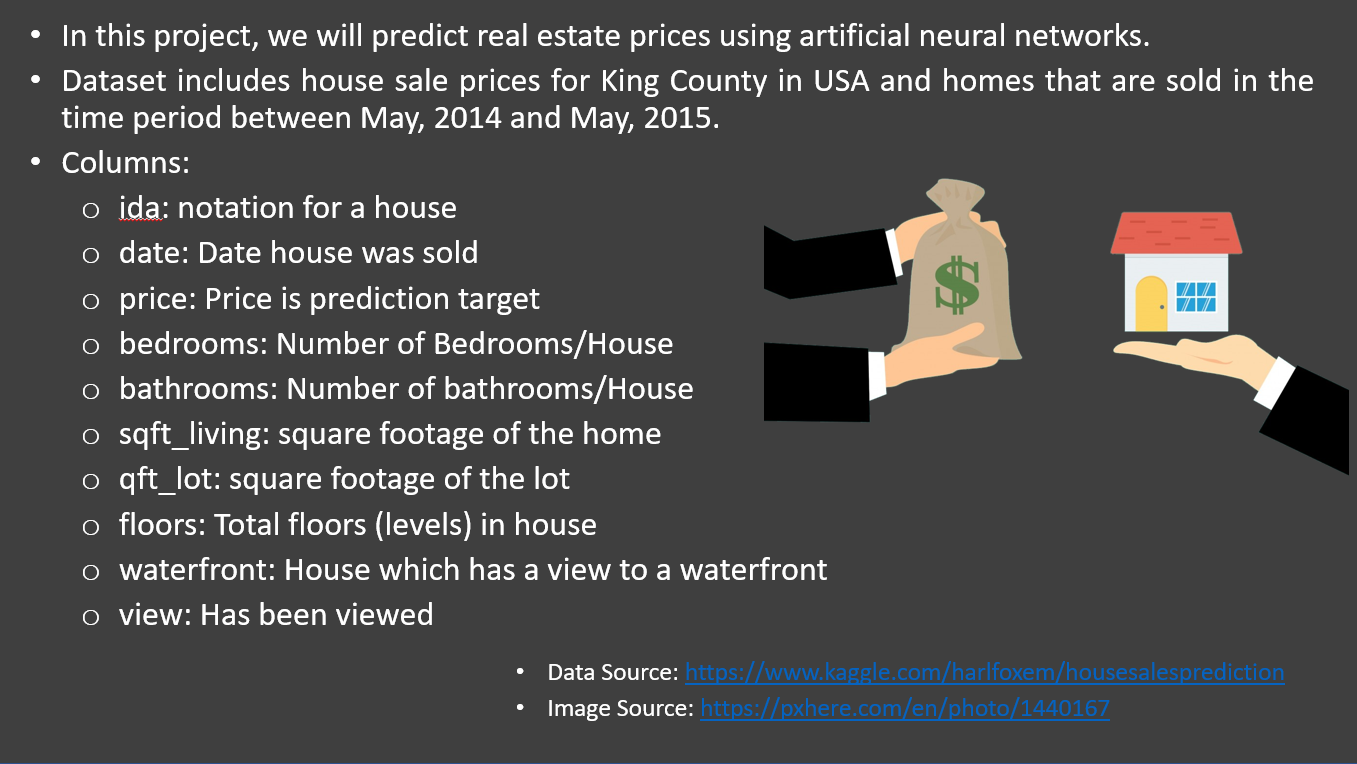

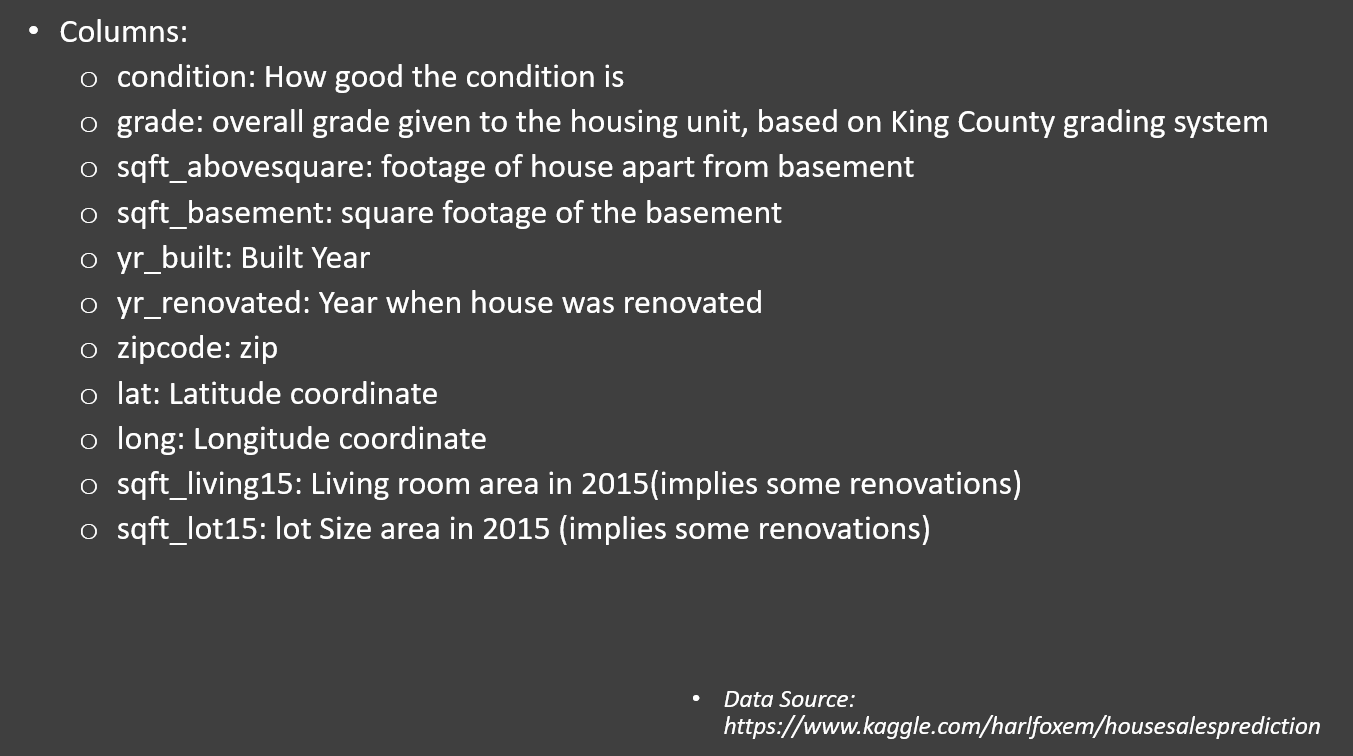

# Step 2: Import libraries and datasets

In [1]:
pip install jupyterthemes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


In [3]:
url='https://raw.githubusercontent.com/cysorianoc/DEEP_LEARNING_REAL_ESTATE/refs/heads/main/realestate_prices.csv'

In [4]:
house_df=pd.read_csv(url, encoding='ISO-8859-1')

In [5]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
# Let's see the first rows of the dataframe
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# We can use tail method to see the last rows
house_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [8]:
# WE can get some information about the dataframe using .info() method

house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We have the number of entries, the different columns, we can see if any missing or null elements are and the data types of the columns.

In [9]:
# We can get extra information using .describe()

house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [10]:
# WE can do some operations with the individual features
# For example the average house price

print(round(house_df['price'].mean(),2))

540088.14


In [11]:
# The price of the cheapest house

print(round(house_df['price'].min(),2))

75000.0


In [12]:
print(round(house_df['price'].max(),2))

7700000.0


In [13]:
# The average number of bathrooms and bedrooms rounded to the lowest integer

print(house_df[['bathrooms','bedrooms']].mean().apply(lambda x: int(round(x, 1))))

bathrooms    2
bedrooms     3
dtype: int64


In [14]:
# The maximum number of bedrooms

print(house_df['bedrooms'].max())

33


# Step 3: Data Visualization

In [15]:
# WE can add some other libraries to get interactive plots
import plotly.express as px
import plotly.io as pio
import seaborn as sns
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

<Axes: xlabel='sqft_living', ylabel='price'>

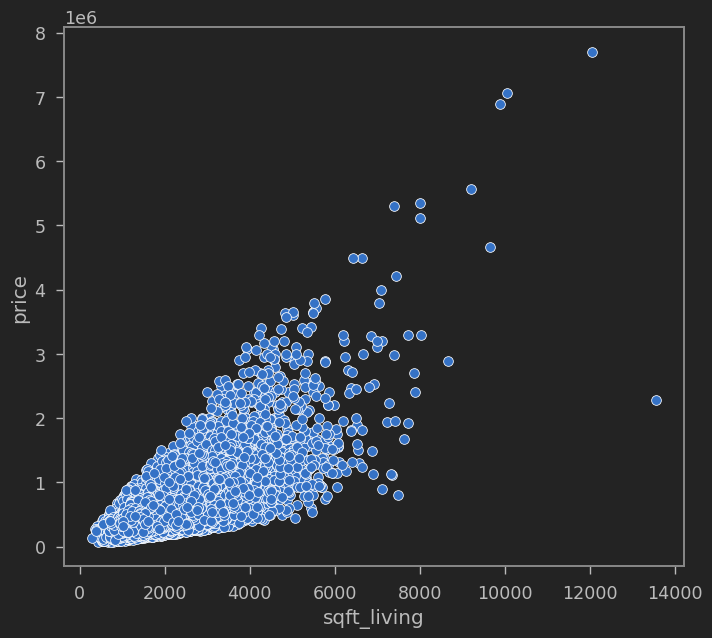

In [16]:
sns.scatterplot(data=house_df, x='sqft_living', y='price')


In [17]:
# using plotly
fig=px.scatter(house_df, x='sqft_living', y='price', template='plotly_dark')
fig.show()

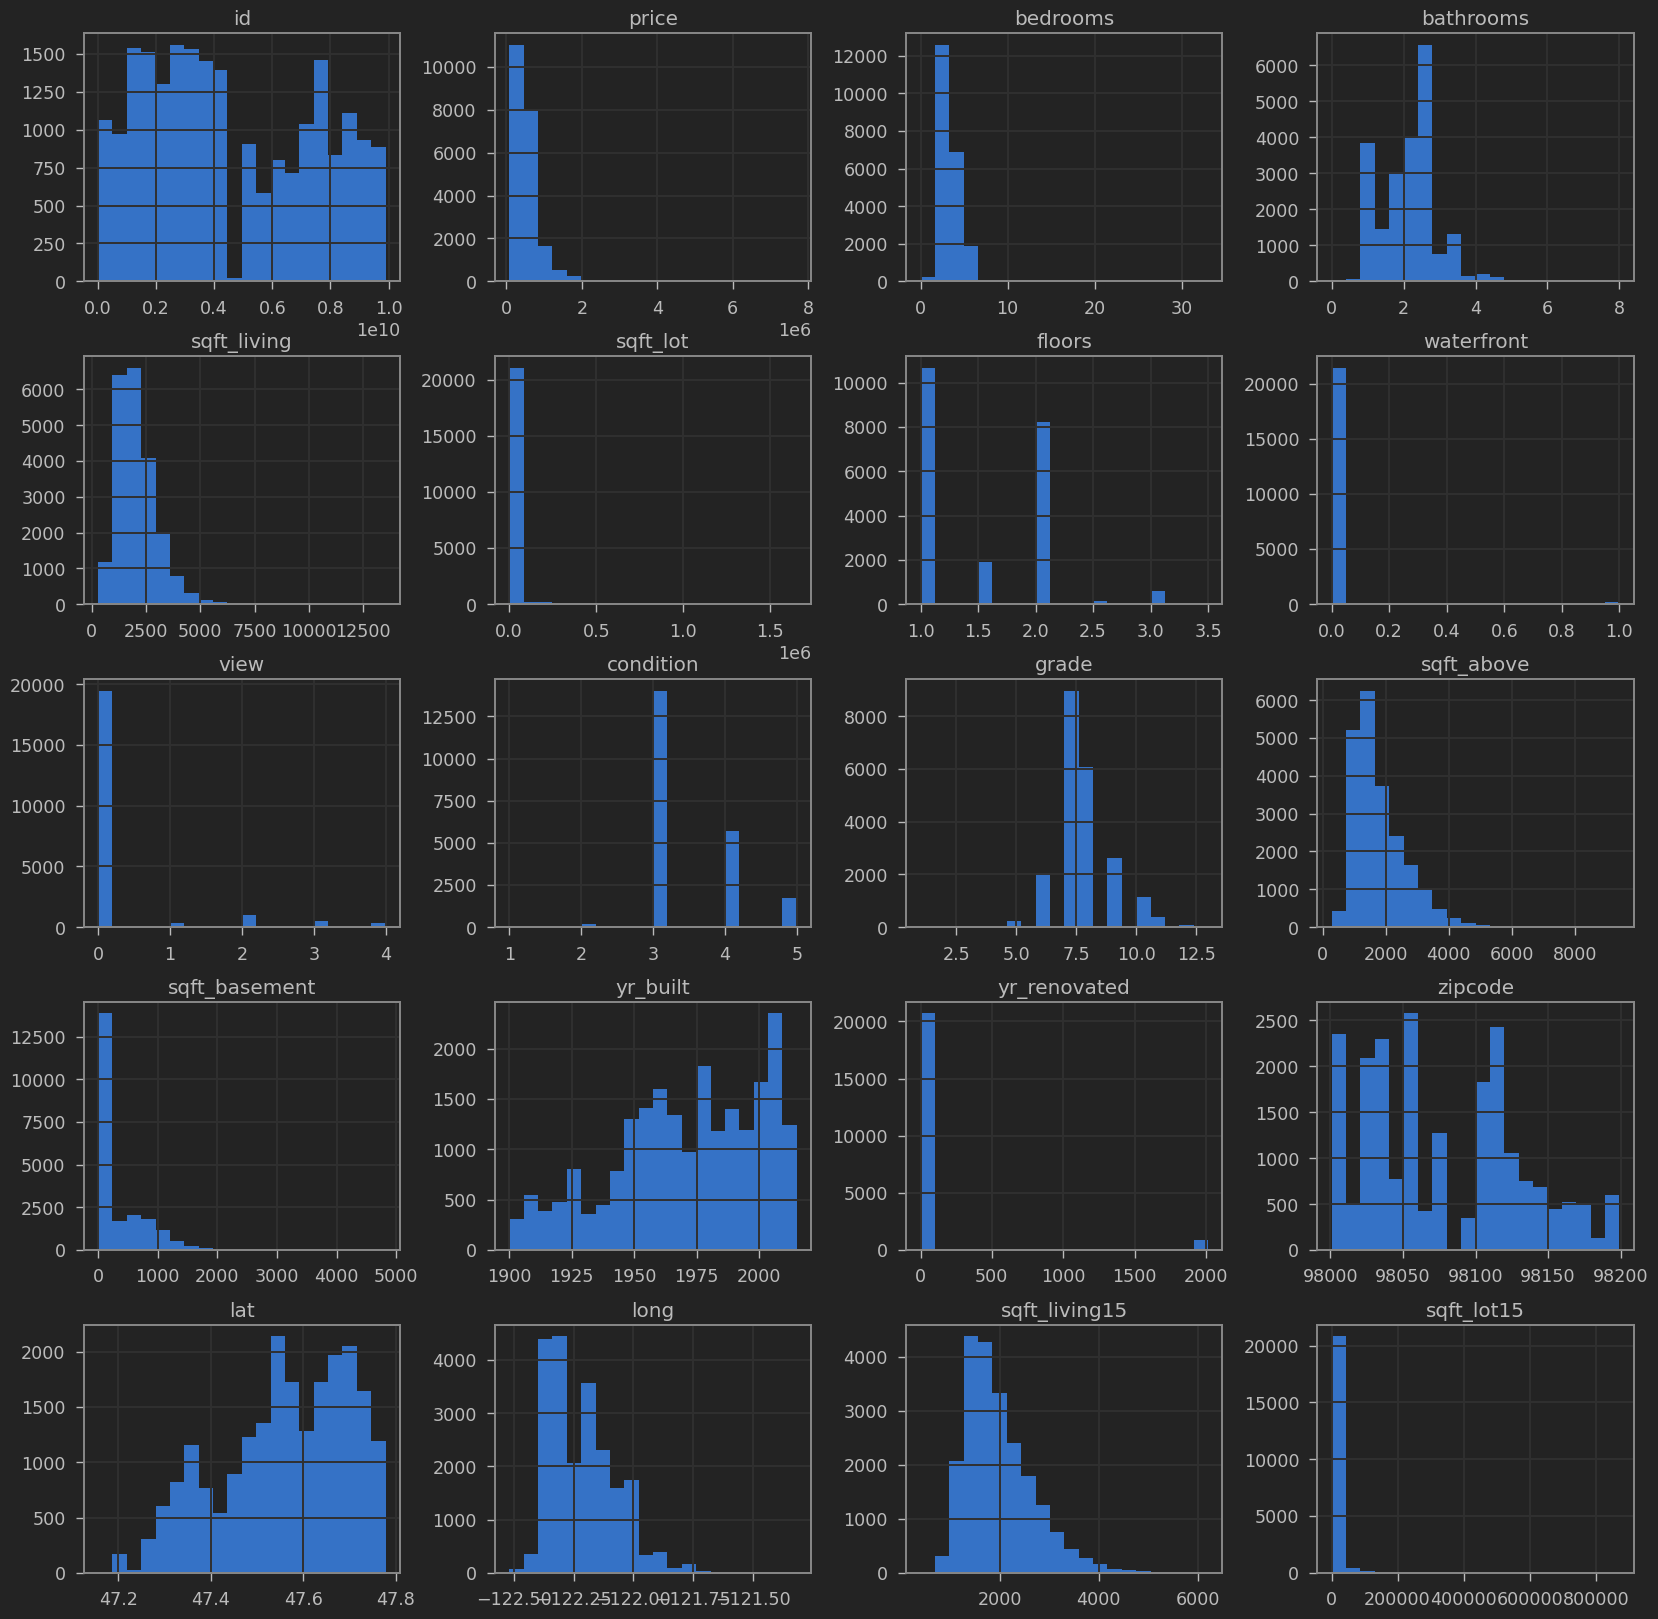

In [18]:
# WE can plot the histograms
house_df.hist(bins=20,figsize=(20,20))
plt.show()

<Axes: >

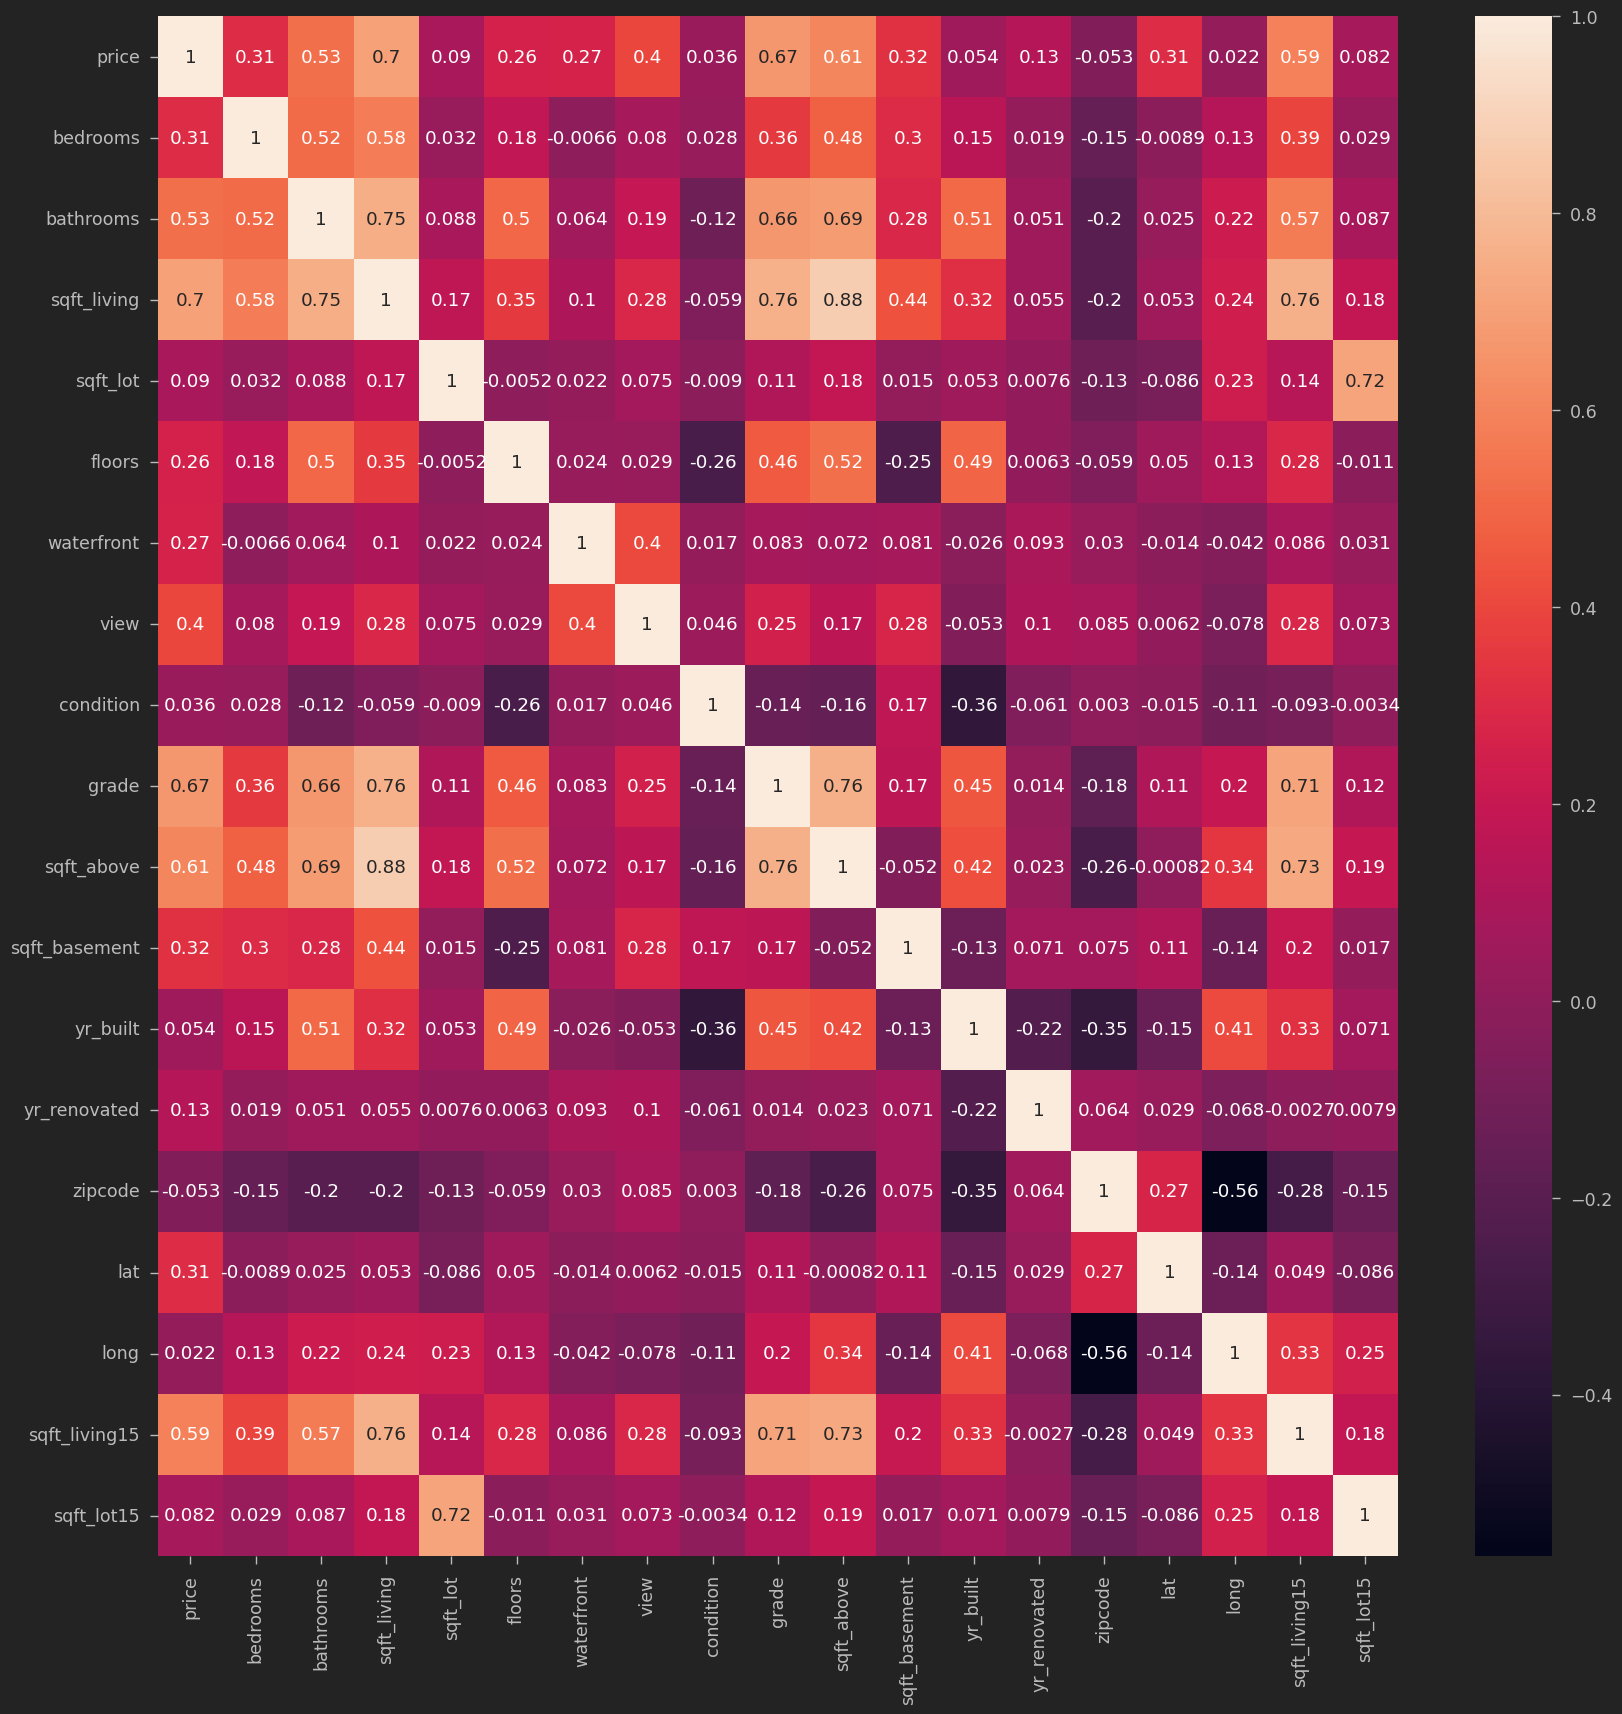

In [19]:
# WE can plot the correlation matrix
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(house_df.drop(['date','id'], axis=1).corr(), annot=True)

In [20]:
# Here we select several features as the one for the predictive model
house_df_sample=house_df[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']]

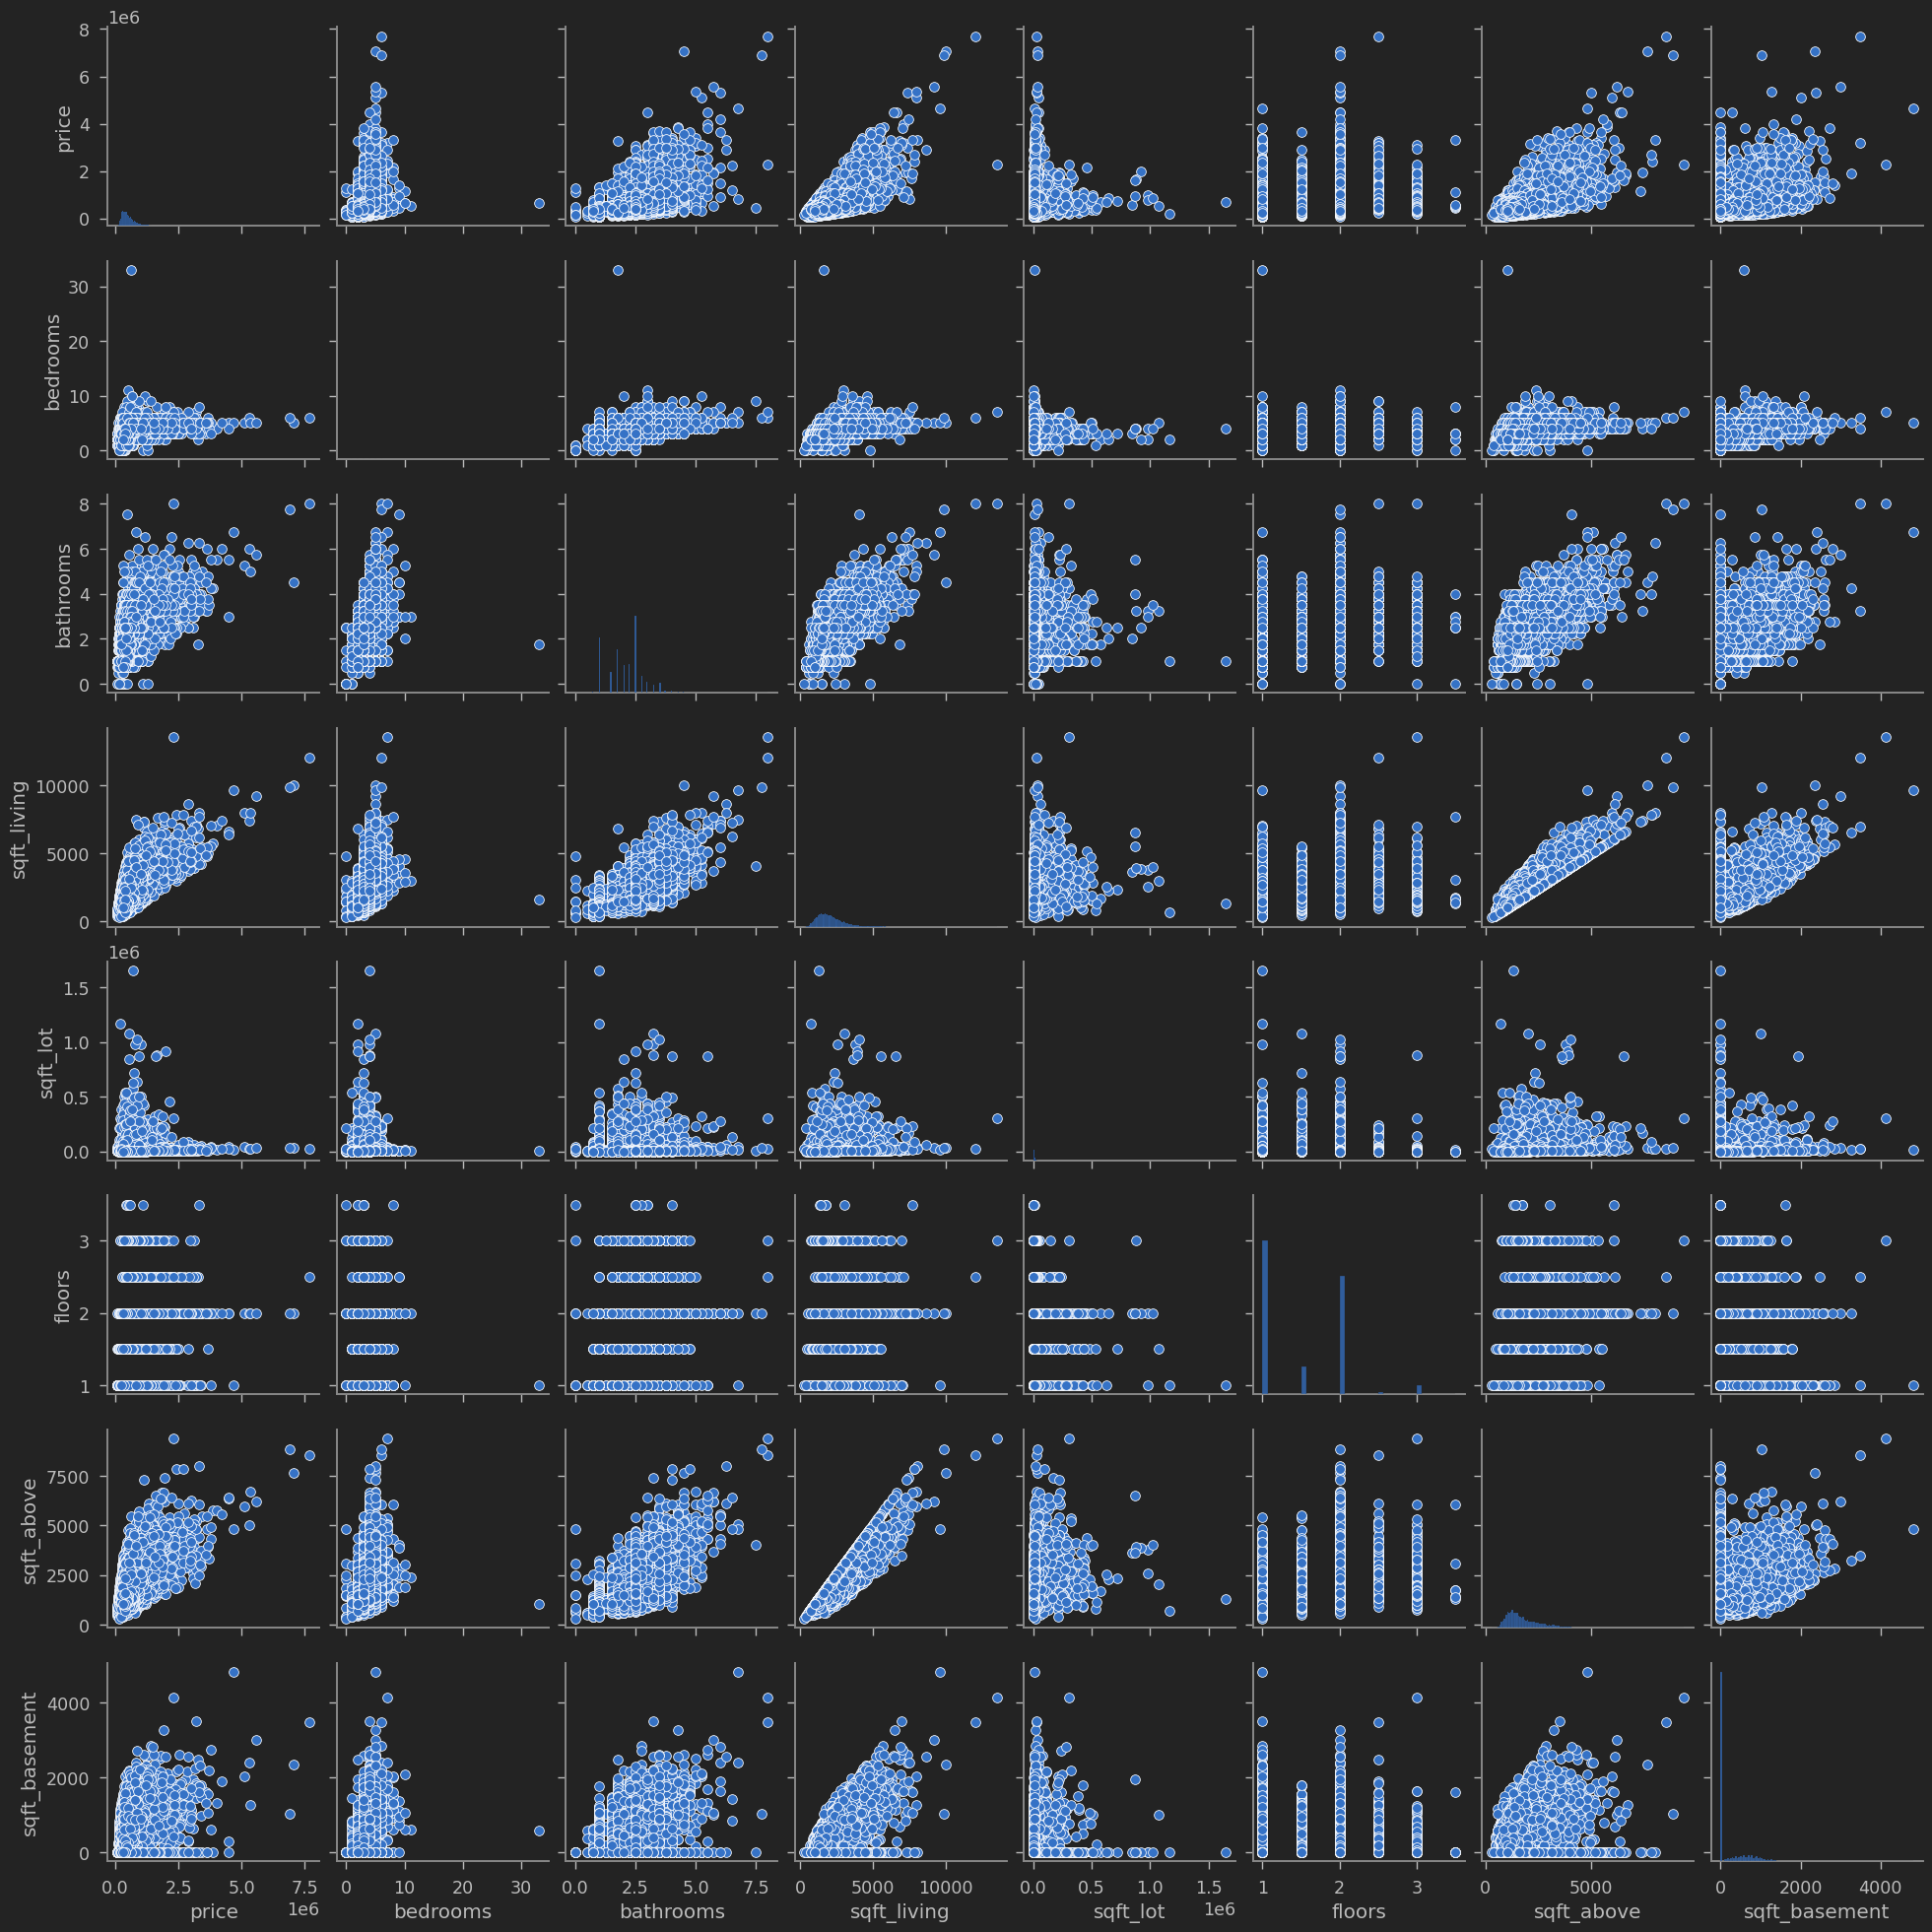

In [21]:
# with the sampled dataframe we can get a pairplot
sns.pairplot(house_df_sample)

# Perform data cleanng and feature engineering

We will select the features for the prediction model.

In [22]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [23]:
# Define the features to be used in the prediction model for price
# We will select several features and then compare with another model
# Including all features to compare performance
X=house_df[selected_features]

In [24]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0


In [25]:
y=house_df['price']

In [26]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [27]:
X.shape

(21613, 7)

In [28]:
y.shape

(21613,)

In [29]:
y=y.values.reshape(-1,1)

Now we need to scale iur data as they have different orders of magnitde.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

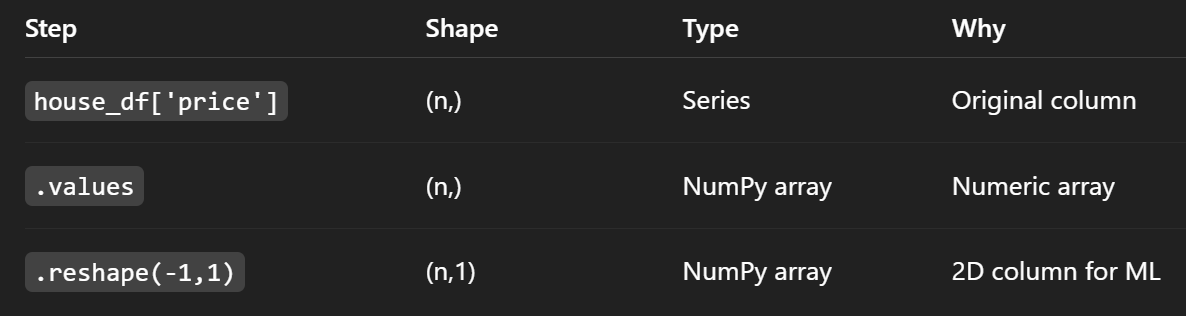

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)


# Train a DL model with limited number of features

In [32]:
# We need to split our data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=42)

In [33]:
X_train.shape

(16209, 7)

In [34]:
X_test.shape

(5404, 7)

# Build the neural network
We will use keras and Tensorflow

In [35]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input

In [36]:

model = Sequential([
    Input(shape=(7,)),  # define the input shape here
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='linear')  # output layer for regression
])


Linear because we are trying to predict a continuous value, a regression type problem

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,101 (82.43 KB)

 Trainable params: 21,101 (82.43 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
# fit the model
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0012 - val_loss: 9.1919e-04
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010 - val_loss: 9.0082e-04
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.7407e-04 - val_loss: 9.2507e-04
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010 - val_loss: 9.1763e-04
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.6582e-04 - val_loss: 9.4130e-04
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.9757e-04 - val_loss: 9.4151e-04
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.9212e-04 - val_loss: 8.9908e-04
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.1728e-04 - val_loss: 9.1862e-04
Epoch 9/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.0783e-04 - val_loss: 9.7506e-04
Epoch 10/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010 - val_loss: 8.7519e-04
Epoch 11/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.7

Exercise: Change the architecture of the network, for example add a 200 neurons dense layer.

In [ ]:
model_2 = Sequential([
    Input(shape=(7,)),  # define the input shape here
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(200, activation='relu'),
    Dense(1, activation='linear')  # output layer for regression
])

In [ ]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,401 (161.72 KB)

 Trainable params: 41,401 (161.72 KB)

 Non-trainable params: 0 (0.00 B)

# Evaluate model performance

The model performance is stored inside the history. For each epoch we have the loss function for the training and validation set.

In [40]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

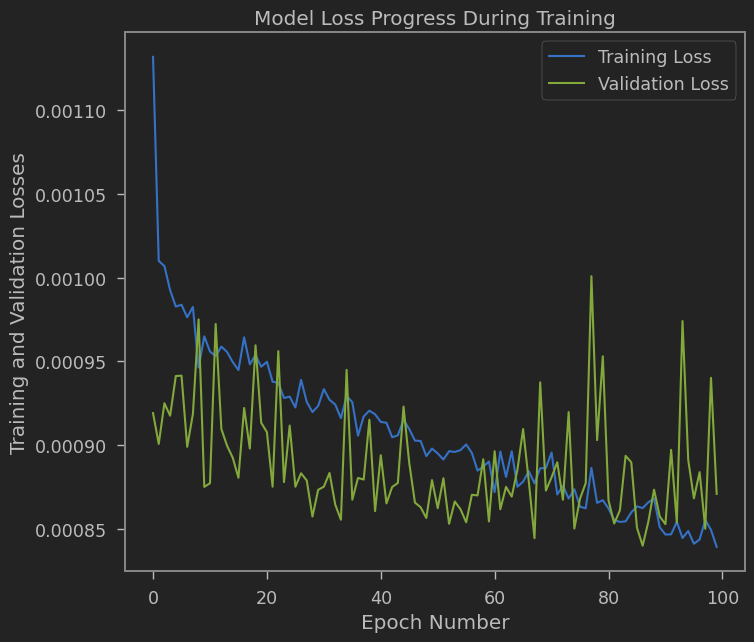

In [41]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
#

On the validation the model seems to overfit

In [42]:
#  Predicting the price of a new house using a trained model

import numpy as np

# ------------------------------------------------------------
# 1️⃣ Define the new house data
# ------------------------------------------------------------
# The input must match the order and number of features used during training.
# Example features: [bedrooms	bathrooms	sqft_living	sqft_lot	floors	sqft_above	sqft_basement]
X_new = pd.DataFrame([[4, 3, 1960, 5000, 1, 2000, 3000]],
                     columns=X.columns)

# ------------------------------------------------------------
# 2️⃣ Scale the new data using the SAME scaler fitted on the training data
# ------------------------------------------------------------
# Do NOT fit a new scaler here — reuse the one from training to ensure consistent scaling.
X_new_scaled = X_scaler.transform(X_new)

# ------------------------------------------------------------
# 3️⃣ Predict the scaled output (price) using the trained model
# ------------------------------------------------------------
y_pred_scaled = model.predict(X_new_scaled)

# ------------------------------------------------------------
# 4️⃣ Inverse-transform the prediction to return to the original units
# ------------------------------------------------------------
# If you also scaled 'y' during training (e.g., with a y_scaler), use that same scaler here.
# Example:
# y_pred = y_scaler.inverse_transform(y_pred_scaled)
#
# But if you didn’t scale 'y', then you can use y_pred_scaled directly.

y_pred = y_scaler.inverse_transform(y_pred_scaled)

# ------------------------------------------------------------
# 5️⃣ Display the predicted price
# ------------------------------------------------------------
print("💰 Predicted house price:", y_pred[0, 0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
💰 Predicted house price: 811935.3


169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(0, 0.5, 'True values')

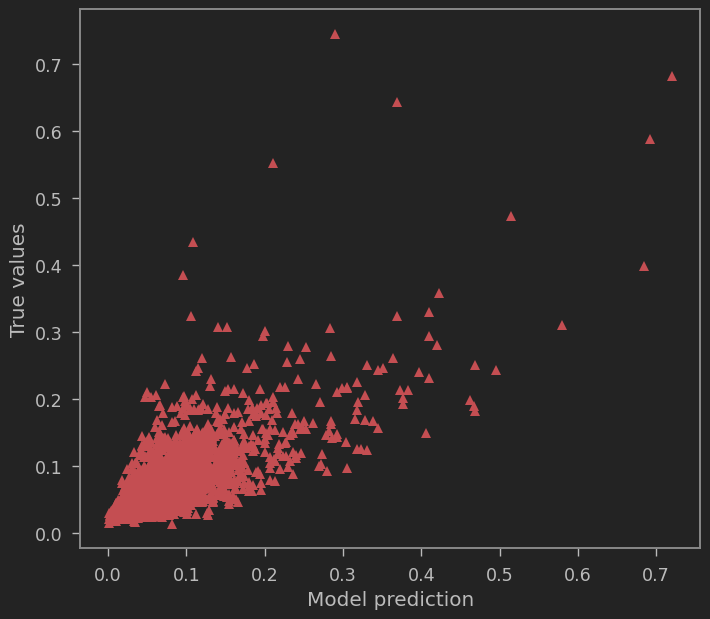

In [43]:
y_predict=model.predict(X_test)
plt.plot(y_test, y_predict, '^', color='r')
plt.xlabel('Model prediction')
plt.ylabel('True values')

In [44]:
# Now we need the plot in dollars
y_predict_orig=y_scaler.inverse_transform(y_predict)
y_test_orig=y_scaler.inverse_transform(y_test)

Text(0, 0.5, 'True values')

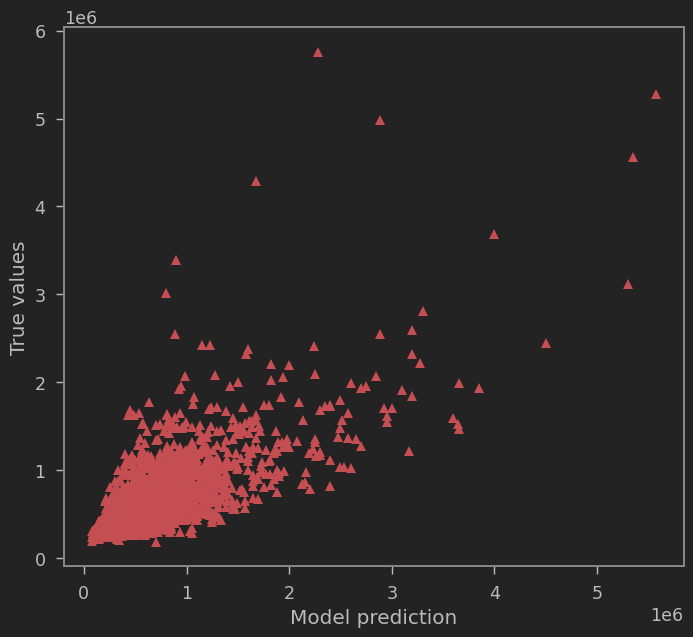

In [45]:
plt.plot(y_test_orig, y_predict_orig, '^', color='r')
plt.xlabel('Model prediction')
plt.ylabel('True values')

In [46]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 256220.845 
MSE = 65649121169.05945 
MAE = 160109.81762062825 
R2 = 0.5611326707808065 
Adjusted R2 = 0.5605633469660299


# Second model: using more features

In [50]:
# Instead using a subset, we wil use the entire dataset
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]
y=house_df['price']

In [51]:
# Also transform y into a 2D column array
y=y.values.reshape(-1,1)

In [53]:
# WE need to scale our data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)



In [54]:
# We need to split our data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=42)

## Build the second Neural Network


In [55]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input

In [58]:
X_train.shape[1] # we can inspect the size of the input dimension

19

In [59]:
model = Sequential([
    Input(shape=(19,)),  # define the input shape here
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')  # output layer for regression
])

In [60]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [61]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0646 - val_loss: 0.0012
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014 - val_loss: 8.3117e-04
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011 - val_loss: 7.6721e-04
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.1772e-04 - val_loss: 6.7843e-04
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0991e-04 - val_loss: 6.3129e-04
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2874e-04 - val_loss: 6.1491e-04
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.7174e-04 - val_loss: 6.0219e-04
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2964e-04 - val_loss: 5.6118e-04
Epoch 9/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.9297e-04 - val_loss: 5.6004e-04
Epoch 10/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.6307e-04 - val_loss: 5.1819e-04
Epoch 11/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8

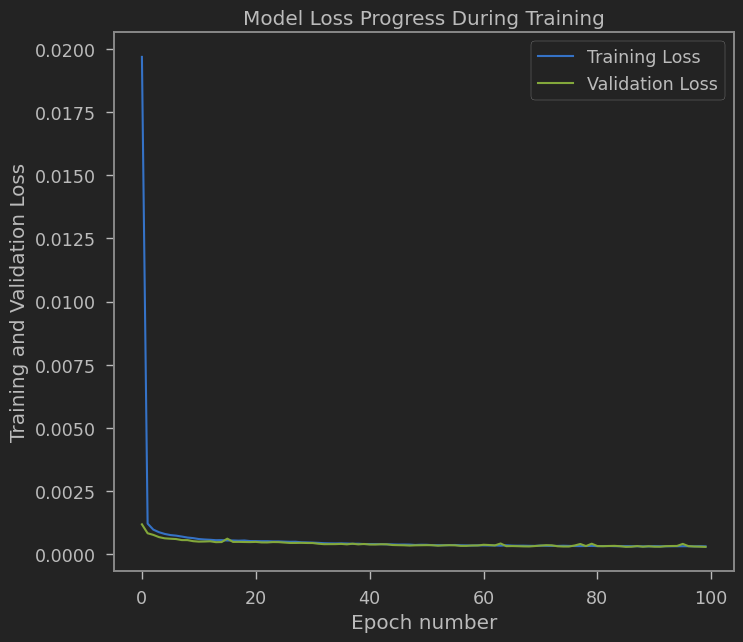

In [62]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


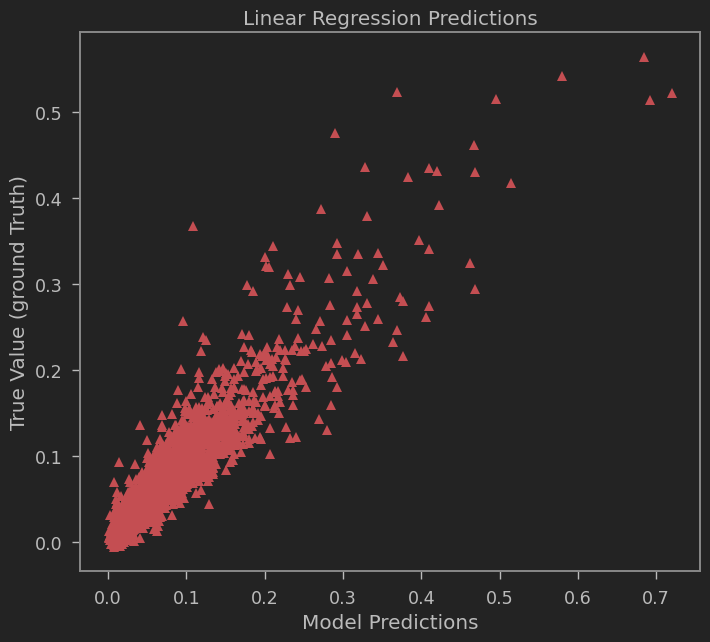

In [63]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

WE see a narrower pattern, seems the model performs better.

In [64]:
y_predict_orig = y_scaler.inverse_transform(y_predict)
y_test_orig = y_scaler.inverse_transform(y_test)

In [65]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 146011.089 
MSE = 21319237973.015976 
MAE = 86115.26490757715 
R2 = 0.8574799347867648 
Adjusted R2 = 0.8572950496020924


### Exercise
Change the architectre of the network to see if we can get a higher R2

Epoch 1/150
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0036 - val_loss: 7.0262e-04
Epoch 2/150
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.6115e-04 - val_loss: 4.9716e-04
Epoch 3/150
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.6689e-04 - val_loss: 5.4514e-04
Epoch 4/150
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.9646e-04 - val_loss: 4.7269e-04
Epoch 5/150
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.6327e-04 - val_loss: 4.3287e-04
Epoch 6/150
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8808e-04 - val_loss: 4.8291e-04
Epoch 7/150
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0893e-04 - val_loss: 3.8555e-04
Epoch 8/150
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1437e-04 - val_loss: 3.7701e-04
Epoch 9/150
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4200e-04 - val_loss: 4.5467e-04
Epoch 10/150
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0399e-04 - val_loss: 3.6303e-04
Epoch 11/150
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

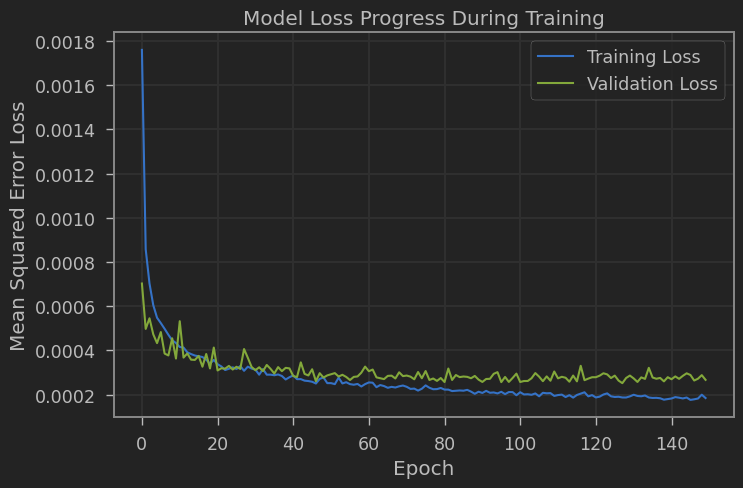

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


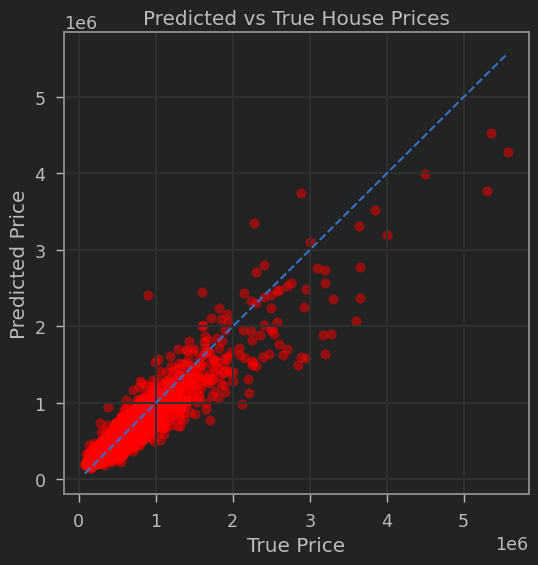

📊 Model Evaluation Metrics
RMSE       = 137,047.19
MSE        = 18,781,931,563.14
MAE        = 76,138.32
R²         = 0.8744
Adjusted R²= 0.8740


In [66]:
# 🏠 House Price Prediction using a Neural Network (Keras + Scikit-learn)
# ------------------------------------------------------------
# This script trains a simple neural network to predict house prices
# based on multiple property features, then evaluates its performance.
# ------------------------------------------------------------

# ------------------------------------------------------------
# 1️⃣ Import required libraries
# ------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

# ------------------------------------------------------------
# 2️⃣ Define input (X) and output (y)
# ------------------------------------------------------------
selected_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition',
    'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
    'sqft_living15', 'sqft_lot15'
]

X = house_df[selected_features]
y = house_df['price'].values.reshape(-1, 1)  # make y 2D for scaling

# ------------------------------------------------------------
# 3️⃣ Scale features and target
# ------------------------------------------------------------
# Using MinMaxScaler to bring all values into [0,1] range for better neural network performance
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)

# ------------------------------------------------------------
# 4️⃣ Split into training and testing datasets
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.25, random_state=42
)

# ------------------------------------------------------------
# 5️⃣ Define an improved neural network architecture
# ------------------------------------------------------------
# Explanation:
# - More neurons and layers allow the network to learn more complex patterns.
# - Dropout helps prevent overfitting.
# - 'relu' activation handles nonlinearities; 'linear' for regression output.
# ------------------------------------------------------------
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # automatically adapts to feature count
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # one output: predicted price
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ------------------------------------------------------------
# 6️⃣ Train the model
# ------------------------------------------------------------
epochs_hist = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=64,
    verbose=1,
    validation_split=0.2
)

# ------------------------------------------------------------
# 7️⃣ Plot training and validation loss
# ------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Mean Squared Error Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 8️⃣ Make predictions on the test set
# ------------------------------------------------------------
y_pred_scaled = model.predict(X_test)

# Convert predictions and true values back to original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test)

# ------------------------------------------------------------
# 9️⃣ Scatter plot: True vs Predicted prices
# ------------------------------------------------------------
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, color='red', alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'b--')
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs True House Prices")
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 🔟 Evaluate model performance
# ------------------------------------------------------------
n = len(y_true)
k = X_train.shape[1]

MSE = mean_squared_error(y_true, y_pred)
RMSE = sqrt(MSE)
MAE = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("📊 Model Evaluation Metrics")
print(f"RMSE       = {RMSE:,.2f}")
print(f"MSE        = {MSE:,.2f}")
print(f"MAE        = {MAE:,.2f}")
print(f"R²         = {r2:.4f}")
print(f"Adjusted R²= {adj_r2:.4f}")
